In [1]:
import pytorch_lightning as pl
from modules.lifter_2d_3d.model.linear_model.lit_linear_model import LitSimpleBaselineLinear as LitModel
from modules.experiments.dataset import (
    construct_drive_and_act_dataset, drive_and_act_dataset_root_path
)
from modules.utils.convention import get_saved_model_path
from modules.experiments.experiment import Experiment

pl.seed_everything(1234)

viewpoint = 'inner_mirror'
pretrained_dataset_name='synthetic_cabin_ir'
pretrained_datasubset_name=f'Rear_Mirror_gt'

pretrained_model_path = get_saved_model_path(
    model_name=LitModel.__name__,
    trained_dataset_name=pretrained_dataset_name,
    trained_datasubset_name=pretrained_datasubset_name,
)
constructed_loader = construct_drive_and_act_dataset(
    dataset_root_path=drive_and_act_dataset_root_path,
    viewpoint=viewpoint
)
saved_model_path = get_saved_model_path(
    model_name=LitModel.__name__,
    model_suffix='all_actors',
    trained_dataset_name=constructed_loader['dataset_name'],
    trained_datasubset_name=constructed_loader['datasubset_name'],
    pretrained_dataset_name=pretrained_dataset_name,
    pretrained_datasubset_name=pretrained_datasubset_name,
)
experiment = Experiment(
    LitModel=LitModel,
    constructed_loader=constructed_loader,
    pretrained_model_path=pretrained_model_path,
    saved_model_path=saved_model_path,
    model_parameters=dict(
        exclude_ankle=True,
        exclude_knee=True
    )
)

experiment.setup()
experiment.train()

Global seed set to 1234


skipping problematic image 4917
skipping problematic image 6939
skipping problematic image 16311
skipping problematic image 32965
skipping problematic image 29724
train_dataset 22896 val_dataset 6241 test_dataset 11017
loaded from ./saved_lifter_2d_3d_model/LitSimpleBaselineLinear/synthetic_cabin_ir/Rear_Mirror_gt


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: saved_lifter_2d_3d_model/LitSimpleBaselineLinear/drive_and_act/inner_mirror_predicted/transfer_learning/synthetic_cabin_ir/Rear_Mirror_gt/all_actors/lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type          | Params
----------------------------------------
0 | model | BaselineModel | 4.3 M 
----------------------------------------
4.3 M     Trainable params
0         Non-trainable params
4.3 M     Total params
17.105    Total estimated model params size (MB)


train_dataset 22896 val_dataset 6241 test_dataset 11017
loaded from ./saved_lifter_2d_3d_model/LitSimpleBaselineLinear/synthetic_cabin_ir/Rear_Mirror_gt


Sanity Checking: 0it [00:00, ?it/s]

check #0
val MPJPE from: 6208 samples : 166.02404415607452
activity_macro_mpjpe 166.02405905723572


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

check #1
training loss from 1785 batches: 104.95156199157404
val MPJPE from: 6208 samples : 69.33395564556122
activity_macro_mpjpe 69.33394819498062


Validation: 0it [00:00, ?it/s]

check #2
training loss from 1785 batches: 98.82156220929963
val MPJPE from: 6208 samples : 68.84754449129105
activity_macro_mpjpe 68.84755194187164


Validation: 0it [00:00, ?it/s]

check #3
training loss from 1785 batches: 96.37518234196163
val MPJPE from: 6208 samples : 69.58625465631485
activity_macro_mpjpe 69.58625465631485


Validation: 0it [00:00, ?it/s]

check #4
training loss from 1785 batches: 95.07785792193826
val MPJPE from: 6208 samples : 68.04291158914566
activity_macro_mpjpe 68.04290413856506


Validation: 0it [00:00, ?it/s]

check #5
training loss from 1785 batches: 93.8264542496672
val MPJPE from: 6208 samples : 68.19532066583633
activity_macro_mpjpe 68.19532066583633


Validation: 0it [00:00, ?it/s]

check #6
training loss from 1785 batches: 92.46549001302706
val MPJPE from: 6208 samples : 66.68916344642639
activity_macro_mpjpe 66.68916344642639


Validation: 0it [00:00, ?it/s]

check #7
training loss from 1785 batches: 91.64244619195534
val MPJPE from: 6208 samples : 67.99488514661789
activity_macro_mpjpe 67.99488514661789


Validation: 0it [00:00, ?it/s]

check #8
training loss from 1785 batches: 90.38633691037403
val MPJPE from: 6208 samples : 65.14307856559753
activity_macro_mpjpe 65.14308601617813


Validation: 0it [00:00, ?it/s]

check #9
training loss from 1785 batches: 90.6652638683466
val MPJPE from: 6208 samples : 66.19426608085632
activity_macro_mpjpe 66.19426608085632


Validation: 0it [00:00, ?it/s]

check #10
training loss from 1785 batches: 89.95447825609135
val MPJPE from: 6208 samples : 67.64312833547592
activity_macro_mpjpe 67.64312833547592


Validation: 0it [00:00, ?it/s]

check #11
training loss from 1785 batches: 89.85293695823151
val MPJPE from: 6208 samples : 67.65907257795334
activity_macro_mpjpe 67.65906512737274


Validation: 0it [00:00, ?it/s]

check #12
training loss from 1785 batches: 88.6623775821273
val MPJPE from: 6208 samples : 67.35248863697052
activity_macro_mpjpe 67.35249608755112


Validation: 0it [00:00, ?it/s]

check #13
training loss from 1785 batches: 88.57374477620218
val MPJPE from: 6208 samples : 66.40535593032837
activity_macro_mpjpe 66.40534847974777


In [2]:
experiment.test()
experiment.print_result()

Restoring states from the checkpoint path at saved_lifter_2d_3d_model/LitSimpleBaselineLinear/drive_and_act/inner_mirror_predicted/transfer_learning/synthetic_cabin_ir/Rear_Mirror_gt/all_actors/lightning_logs/version_0/checkpoints/epoch=39-step=14280.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at saved_lifter_2d_3d_model/LitSimpleBaselineLinear/drive_and_act/inner_mirror_predicted/transfer_learning/synthetic_cabin_ir/Rear_Mirror_gt/all_actors/lightning_logs/version_0/checkpoints/epoch=39-step=14280.ckpt


Testing: 0it [00:00, ?it/s]

activity_macro_mpjpe 56.451454758644104


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│   activity_macro_mpjpe    │    56.451454758644104     │
│           mpjpe           │    56.116051971912384     │
└───────────────────────────┴───────────────────────────┘

MPJPE = 56.116051971912384
PJPE =
                     PJPE
nose            46.955685
left_eye        44.248112
right_eye       44.327431
left_ear        12.783846
right_ear       33.599819
left_shoulder   17.075333
right_shoulder  22.543781
left_elbow      63.698120
right_elbow     56.754360
left_wrist      69.886314
right_wrist     75.581070
left_hip        62.589722
right_hip       61.745220
Activity-based Macro Average MPJPE = 56.451454758644104
activity_mpjpe =
                   MPJPE
sitting_still  56.116052


## Train Samples

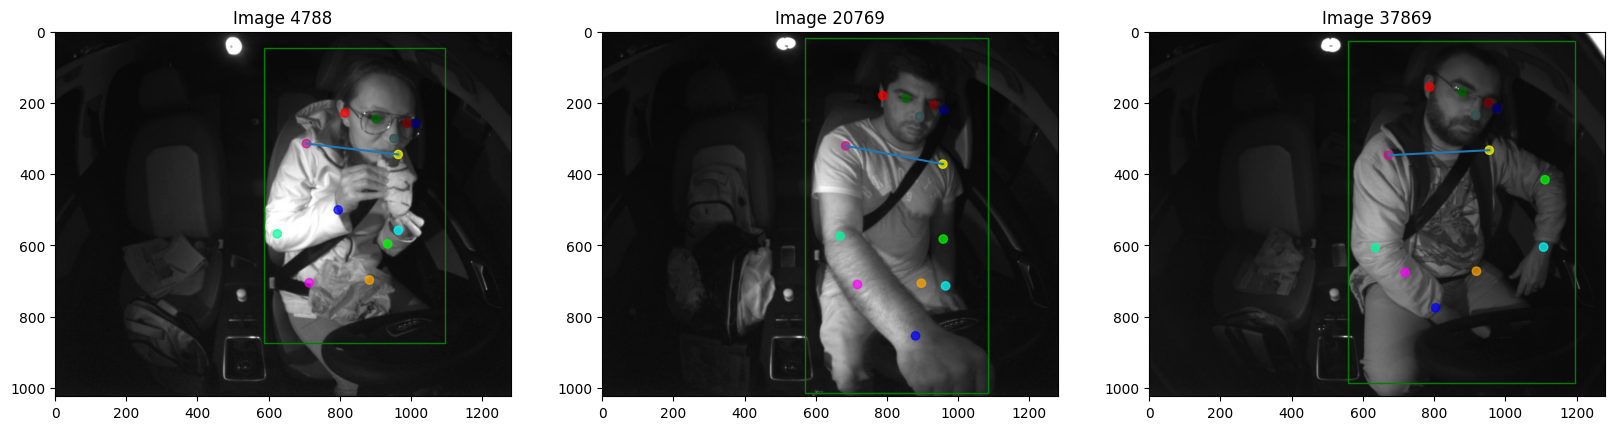

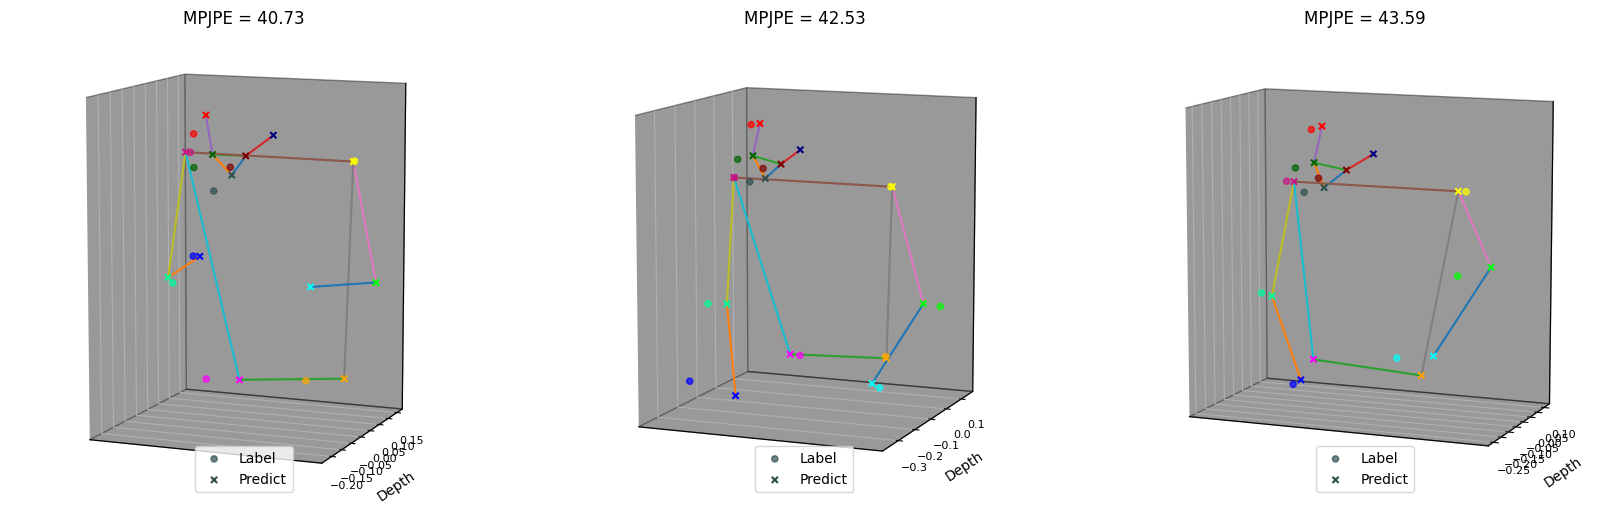

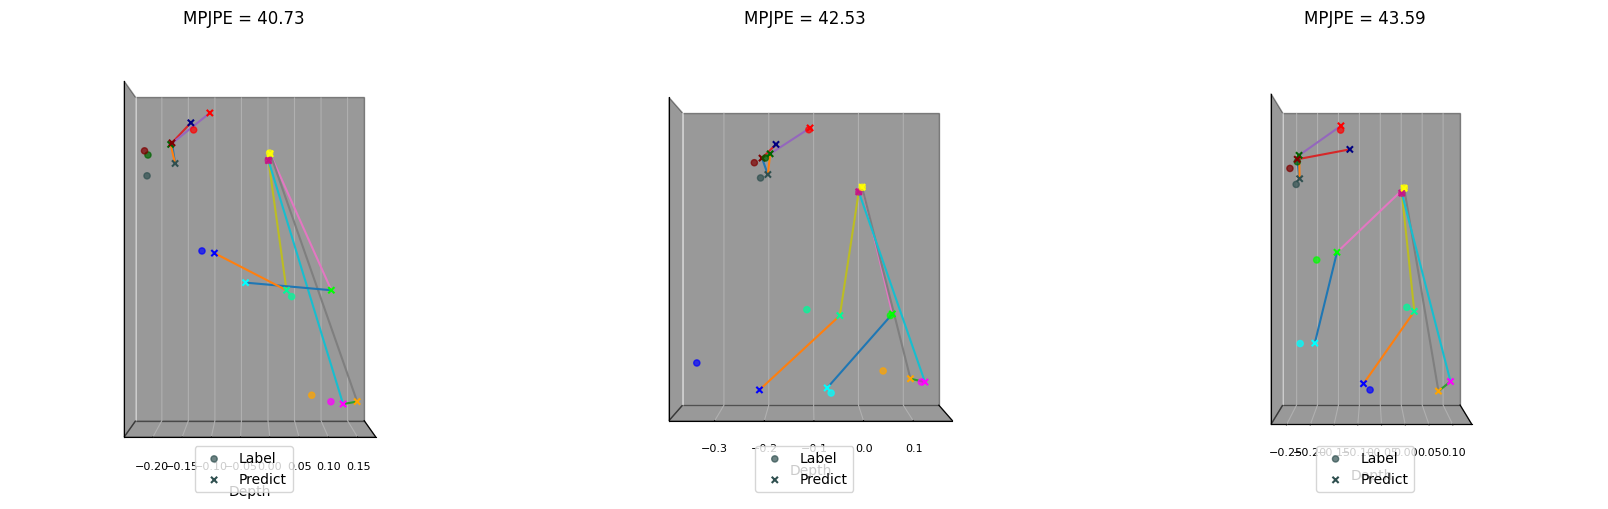

In [3]:
from modules.utils.visualization import (
    plot_samples
)
from pathlib import Path

dataset_length = len(experiment.train_loader.dataset)
plot_samples(
    drive_and_act_dataset_root_path / viewpoint,
    experiment.lit_model,
    experiment.train_loader,
    'train',
    img_figsize=(20, 10),
    plot_figsize=(20.5, 10),
    sample_indices=[
        int(dataset_length * 0.1),
        int(dataset_length * 0.5),
        int(dataset_length * 0.9),
    ],
    is_plot_gt_skeleton=False
)

## Test Samples

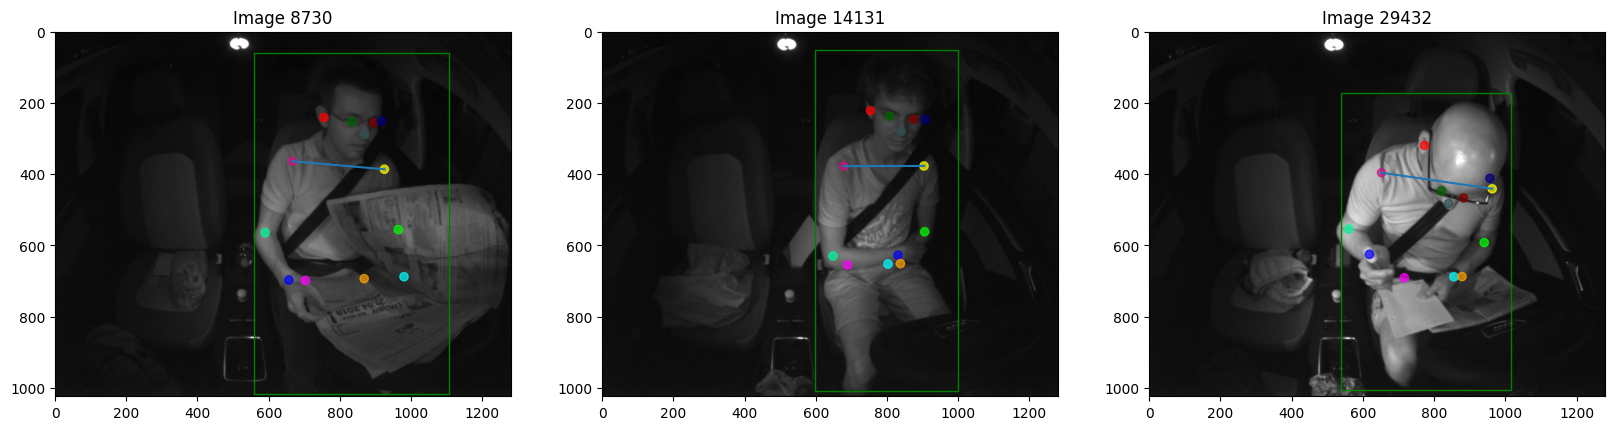

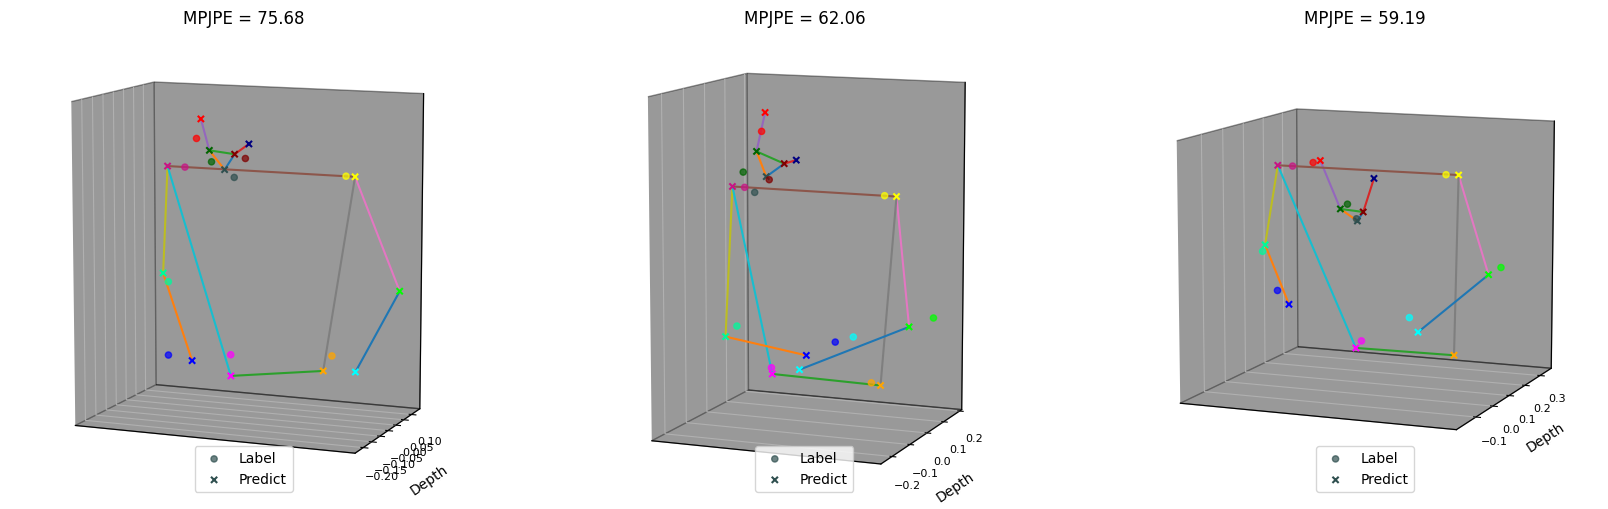

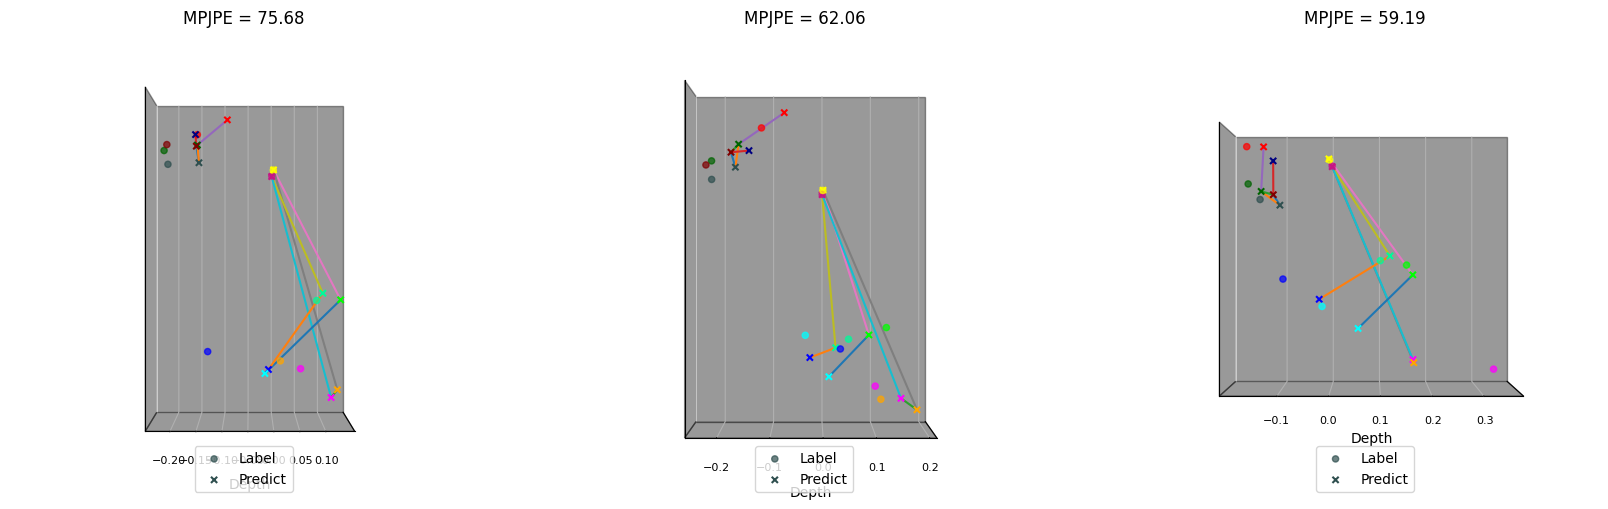

In [4]:
from modules.utils.visualization import (
    plot_samples
)
dataset_length = len(experiment.test_loader.dataset)
plot_samples(
    drive_and_act_dataset_root_path / viewpoint,
    experiment.lit_model,
    experiment.test_loader,
    'train',
    img_figsize=(20, 10),
    plot_figsize=(20.5, 10),
    sample_indices=[
        int(dataset_length * 0.1),
        int(dataset_length * 0.5),
        int(dataset_length * 0.9),
    ],
    is_plot_gt_skeleton=False
)